In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
# from statsmodels.sandbox.regression.predstd import wls_prediction_std

Text(0, 0.5, 'disease rate')

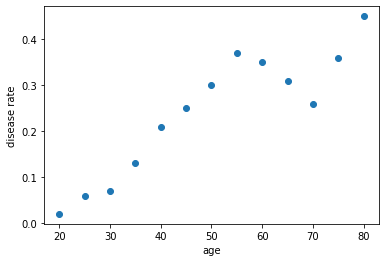

In [2]:
age = np.array([20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])
disease_rate = np.array([2, 6, 7, 13, 21, 25, 30, 37, 35, 31, 26, 36, 45])*0.01
plt.scatter(age, disease_rate)
plt.xlabel("age")
plt.ylabel("disease rate")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     56.20
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           6.78e-06
Time:                        23:44:06   Log-Likelihood:                 30.002
No. Observations:                  13   AIC:                            -50.00
Df Residuals:                       8   BIC:                            -47.18
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5333      0.486      3.158      0.0

C:\Users\a3573\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


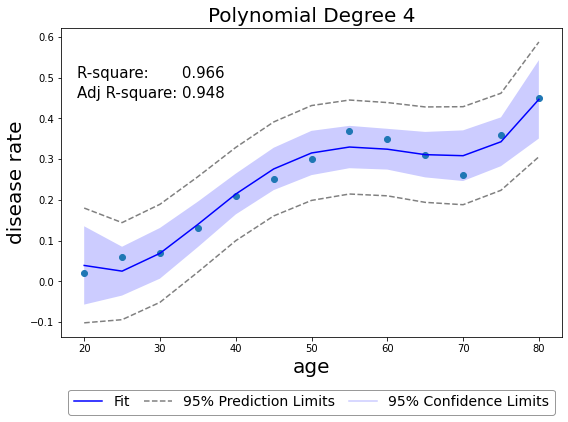

In [34]:
age = age.reshape(-1,1)
# reg = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
# reg.fit(age.reshape(-1,1), disease_rate)
degrees = [2,3,4,5,6,7]
for d in degrees:
    polynomial_features= PolynomialFeatures(degree=d)
    age_p = polynomial_features.fit_transform(age)
    reg = sm.OLS(disease_rate, age_p).fit()
    y_pred = reg.predict(age_p)
    # plot---------------------------
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(age, disease_rate)
    plt.plot(age, y_pred, label="Fit")
    plt.xlabel("age", size=20)
    plt.ylabel("disease rate", size=20)
    plt.title(f"Polynomial Degree {d}", size=20)
    plt.legend(loc="upper left", prop={'size': 20})
    plt.text(19,0.37, f"R-square:       {round(reg.rsquared,3)}", size=20)
    plt.text(19,0.34, f"Adj R-square: {round(reg.rsquared_adj,3)}", size=20)
    # Save Figure
    plt.tight_layout()
    plt.savefig(f"Polynomial_degree_{d}.jpg")

    from statsmodels.stats.outliers_influence import summary_table
    # Ref:https://stackoverflow.com/questions/17559408/confidence-and-prediction-intervals-with-statsmodels/47191929#47191929
    # https://stackoverflow.com/questions/27164114/show-confidence-limits-and-prediction-limits-in-scatter-plot/63560689#63560689

    st, data, ss2 = summary_table(reg, alpha=0.01)

    fittedvalues = data[:, 2]
    predict_mean_se  = data[:, 3]
    predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
    predict_ci_low, predict_ci_upp = data[:, 6:8].T

    # Check we got the right things
    # _, iv_l,iv_u = wls_prediction_std(reg)
    # print(np.max(np.abs(reg.fittedvalues - fittedvalues)))
    # print(np.max(np.abs(iv_l - predict_ci_low)))
    # print(np.max(np.abs(iv_u - predict_ci_upp)))

    # Plotting --------------------------------------------------------------------
    fig, ax = plt.subplots(figsize=(8, 6))

    ax.plot(age, disease_rate, 'o')
    ax.plot(age, fittedvalues, 'b-', lw=1.5, label="Fit")
    # Prediction Interval
    ax.plot(age, predict_ci_low, "--", color="0.5", lw=1.5, label="95% Prediction Limits")
    ax.plot(age, predict_ci_upp, "--", color="0.5", lw=1.5)
    plt.xlabel("age", size=20)
    plt.ylabel("disease rate", size=20)
    plt.title(f"Polynomial Degree {d}", size=20)
    plt.text(19,0.5, f"R-square:       {round(reg.rsquared,3)}", size=15)
    plt.text(19,0.45, f"Adj R-square: {round(reg.rsquared_adj,3)}", size=15)
    
    # Confidence Interval
    ax.fill_between(age.reshape(len(age)), predict_mean_ci_upp, predict_mean_ci_low, facecolor='blue', alpha=0.2)
    # Custom legend
    handles, labels = ax.get_legend_handles_labels()
    display = (0, 1)
    anyArtist = plt.Line2D((0, 1), (0, 0), color='blue', alpha=0.2)    # create custom artists
    legend = plt.legend(
        [handle for i, handle in enumerate(handles) if i in display] + [anyArtist],
        [label for i, label in enumerate(labels) if i in display] + ["95% Confidence Limits"],
        loc=9, bbox_to_anchor=(0, -0.25, 1., 0.102), ncol=3, mode="expand",prop={'size': 14}
    )  
    frame = legend.get_frame().set_edgecolor("0.5")
    plt.tight_layout()
    plt.savefig(f"Iv_degree_{d}.jpg")
    print(reg.summary())

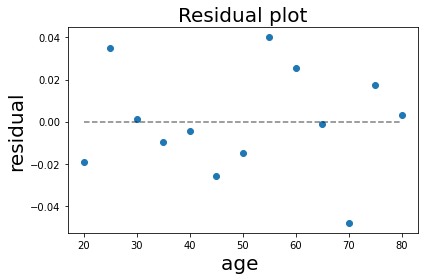

In [41]:
# residual
residual = disease_rate - y_pred
plt.scatter(age, residual)
plt.xlabel("age ",size=20)
plt.ylabel("residual",size=20)
plt.title("Residual plot",size=20)
plt.plot((20,80),(0,0), "--", color="black", alpha=0.5)
plt.tight_layout()
plt.savefig("res.jpg")